# Business case- To predict insurance charges 

In [1]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor
from scipy import stats
from math import sqrt
%matplotlib inline

In [2]:
# loading data 
df=pd.read_csv("datasets_13720_18513_insurance(1).csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#Basic check-understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print("Dimension of insurance dataset:",df.shape)
print("Statistical summary of dataset:\n",df.describe())

Dimension of insurance dataset: (1338, 7)
Statistical summary of dataset:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
#Here in this dataset Target column/dependent column is "charges". and since it is contiouns numerical, It is Regression problem

# EDA

In [7]:
#univariate analysis

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
print("The details of age are:\n",df["age"].describe())

The details of age are:
 count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


In [10]:
print("The details of sex column is:\n",df["sex"].value_counts())

The details of sex column is:
 male      676
female    662
Name: sex, dtype: int64


In [11]:
print("The details of BMI are:\n",df["bmi"].describe())

The details of BMI are:
 count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [12]:
print("The details of children are:\n",df["children"].value_counts())

The details of children are:
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [13]:
print("The details of smoker are:\n",df["smoker"].value_counts()) # 274 people are of smoker category

The details of smoker are:
 no     1064
yes     274
Name: smoker, dtype: int64


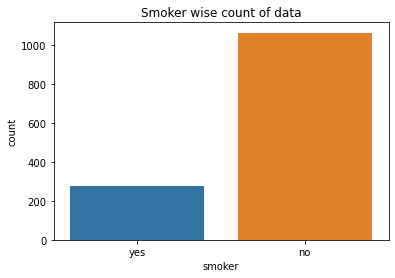

In [14]:
# Plottin count plot 
sns.countplot(x="smoker",data=df)
plt.title("Smoker wise count of data")
plt.show()

In [15]:
print("The details of region column are:\n",df["region"].value_counts()) # mostly people are from southeast region

The details of region column are:
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


----------------------BOX PLOT----------------


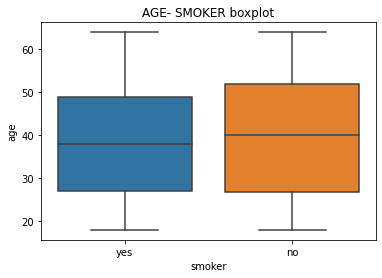

In [16]:
#creating a boxplot 
print("----------------------BOX PLOT----------------")
sns.boxplot(x="smoker",y="age",data=df)
plt.title("AGE- SMOKER boxplot")
plt.show()

---------------------DISTIBUTION PLOT----------------------------


C:\Users\Bittu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bittu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


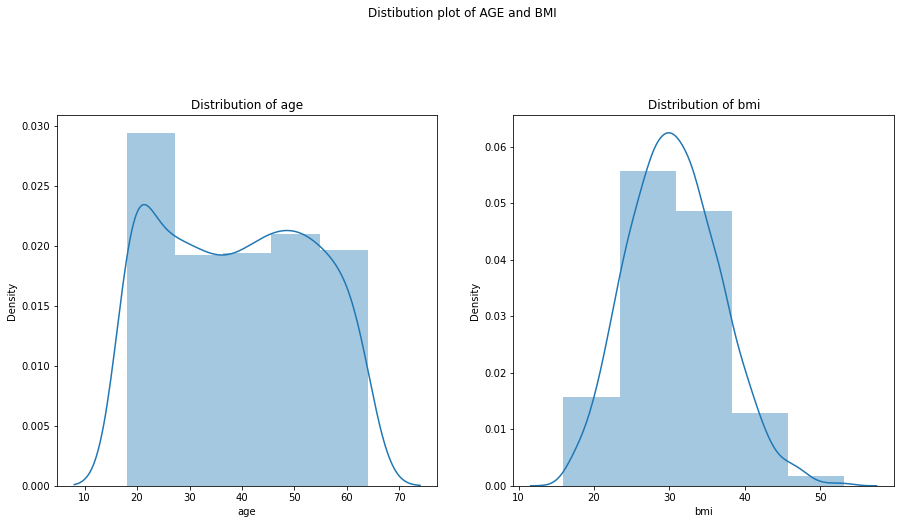

In [17]:
#creating distribution plot 
print("---------------------DISTIBUTION PLOT----------------------------")
plt.figure(1,figsize=(15,15))
plt.subplot(221)
sns.distplot(df["age"],bins=5).set_title("Distribution of age")
plt.subplot(222)
sns.distplot(df["bmi"],bins=5).set_title("Distribution of bmi")
plt.suptitle("Distibution plot of AGE and BMI")
plt.show()

------------------------------HISTOGRAM---------------------------------


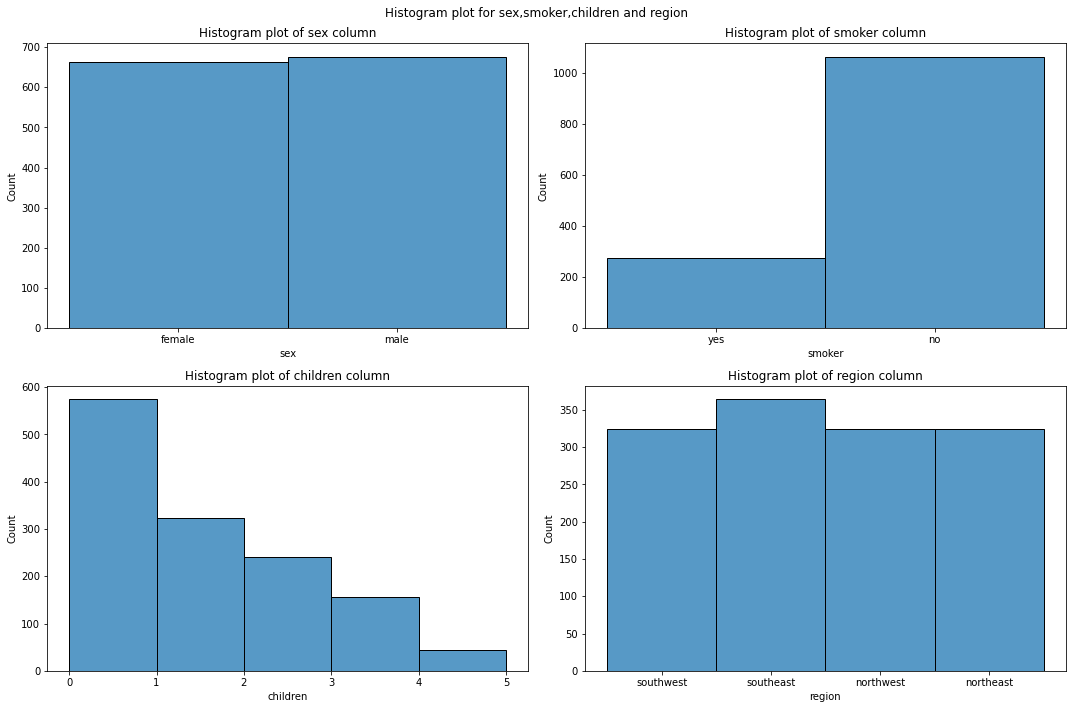

In [18]:
#creating Histogram plot for sex,smoker,children and region
print("------------------------------HISTOGRAM---------------------------------")
plt.figure(2,figsize=(15,10))
plt.subplot(221)
sns.histplot(df["sex"],bins=5).set_title("Histogram plot of sex column")
plt.subplot(222)
sns.histplot(df["smoker"],bins=5).set_title("Histogram plot of smoker column")
plt.subplot(223)
sns.histplot(df["children"],bins=5).set_title("Histogram plot of children column")
plt.subplot(224)
sns.histplot(df["region"],bins=5).set_title("Histogram plot of region column")
plt.suptitle("Histogram plot for sex,smoker,children and region")
plt.tight_layout()
plt.show()

In [19]:
#Bivariate analysis

----------------------------------HEAT MAP-------------------------


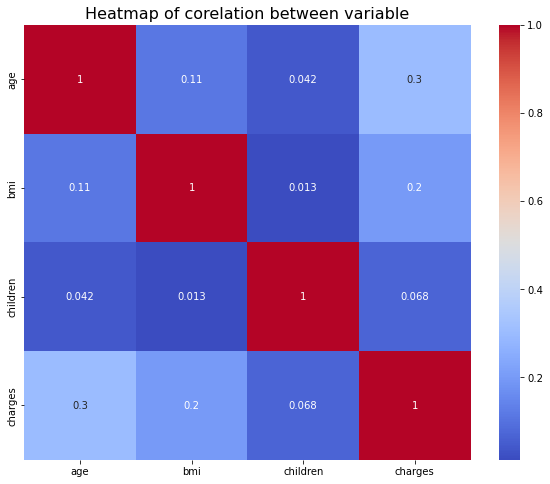

In [20]:
#creating a heatmap for corelation
print("----------------------------------HEAT MAP-------------------------")
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title("Heatmap of corelation between variable",fontsize=16)
plt.show()

-------------------------SCATTER PLOT---------------------------


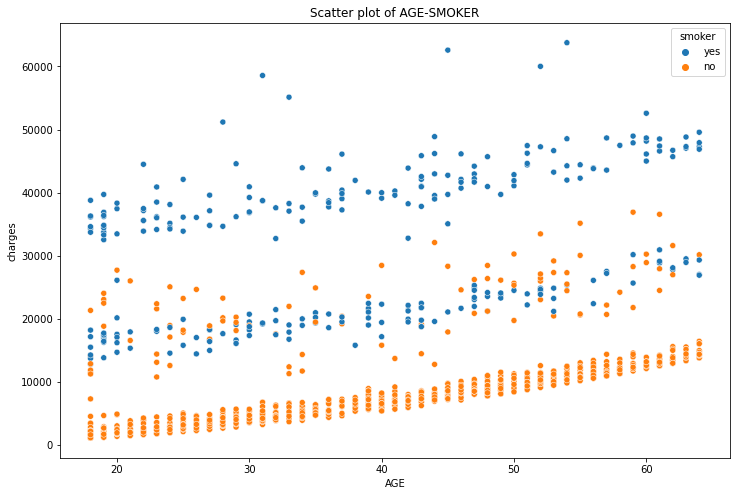

In [21]:
#creating a scatter plot between age and smoker
print("-------------------------SCATTER PLOT---------------------------")
plt.figure(figsize=(12,8))
sns.scatterplot(x="age",y="charges",hue="smoker",data=df).set_title("Scatter plot of AGE-SMOKER")
plt.xlabel("AGE")
plt.ylabel("charges")
plt.show()

----------------------------SCATTER PAIR PLOT-------------------


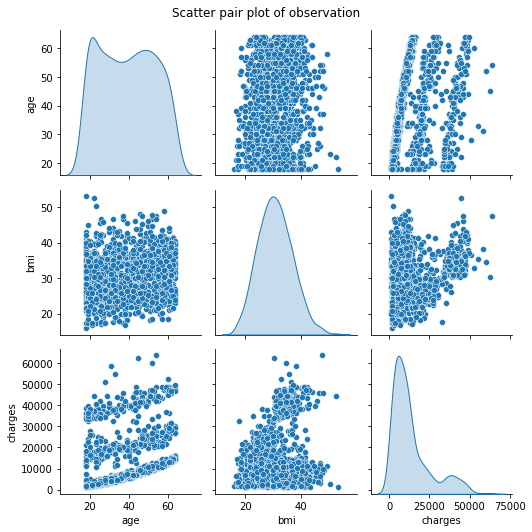

In [22]:
#pair plot considering kde as diagonal plot
print("----------------------------SCATTER PAIR PLOT-------------------")
sns.pairplot(df[["age","bmi","charges"]],kind="scatter",diag_kind="kde")
plt.suptitle("Scatter pair plot of observation")
plt.tight_layout()
plt.show()

------------------------------------Regression pair plot------------------------


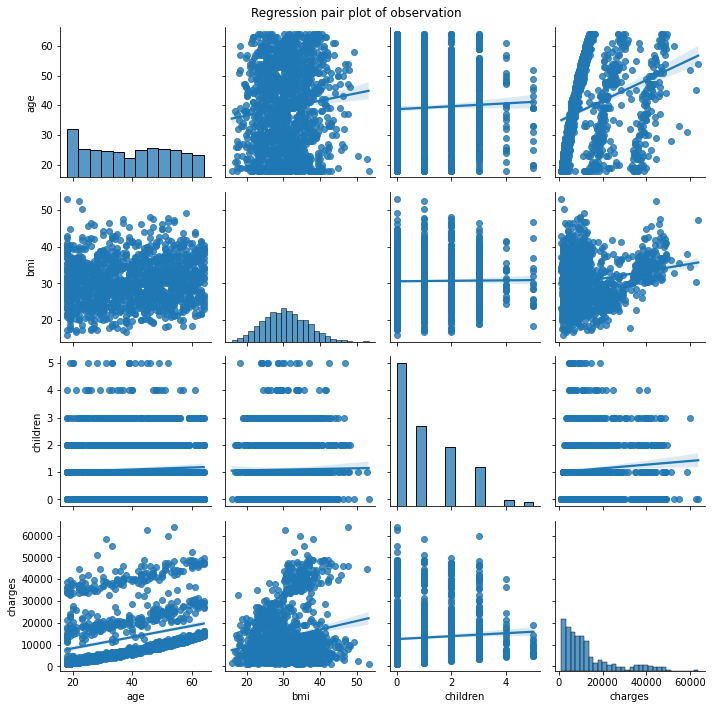

In [23]:
#plotting regression pair plot with histogram
print("------------------------------------Regression pair plot------------------------")
sns.pairplot(df,diag_kind="hist",kind="reg",)
plt.suptitle("Regression pair plot of observation")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [24]:
#checking for missing value
df.isna().sum() # No missing value found

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
#checking for normality
print("skewness of age and bmi:\n",stats.skew(df[["age","bmi"]]))
print("kurtosis of age and bmi:\n",stats.kurtosis(df[["age","bmi"]]))
print("Applying shapiro test:\n",stats.shapiro(df[["age","bmi"]]))

# as skewness is in the normal distribution range. it is normally distributed

skewness of age and bmi:
 [0.05561008 0.28372857]
kurtosis of age and bmi:
 [-1.24492068 -0.05502311]
Applying shapiro test:
 ShapiroResult(statistic=0.9401692152023315, pvalue=1.375259271394248e-31)


In [26]:
#checking for outlier

C:\Users\Bittu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

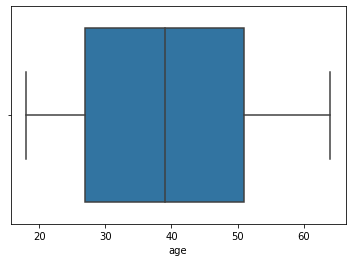

In [27]:
sns.boxplot(df["age"]) # no outlier found

C:\Users\Bittu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

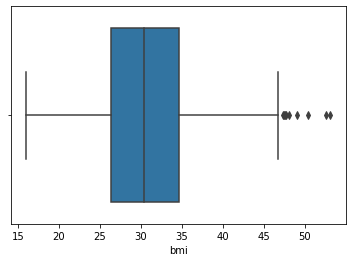

In [28]:
#checking fo BMI column
sns.boxplot(df["bmi"]) # There are some outlier in bmi. need to work on it

In [29]:
#checking outlier with zscore
zscore=np.abs(stats.zscore(df["bmi"]))
print("The z score of BMI are:\n",zscore)

The z score of BMI are:
 0       0.453320
1       0.509621
2       0.383307
3       1.305531
4       0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336    0.797813
1337    0.261388
Name: bmi, Length: 1338, dtype: float64


In [30]:
#Determine indexes where zscore is greater than 3
df.loc[zscore>3,"bmi"]

116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64

In [31]:
df["bmi"].nlargest()

1317    53.13
1047    52.58
847     50.38
116     49.06
286     48.07
Name: bmi, dtype: float64

In [32]:
#replacing outlier with upper most limit
df.loc[df["bmi"]>48.07,"bmi"]=48 # no completly outlier removed

C:\Users\Bittu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

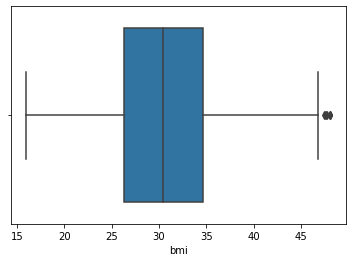

In [33]:
sns.boxplot(df["bmi"])

In [34]:
#label encoding-changing categorical into numerical
Label_Encoding=LabelEncoder()
df["sex"]=Label_Encoding.fit_transform(df["sex"])
df["smoker"]=Label_Encoding.fit_transform(df["smoker"])
df["region"]=Label_Encoding.fit_transform(df["region"])

In [35]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [36]:
#scaling the data
sc=StandardScaler()
df_scaled=sc.fit_transform(df.drop(columns="charges"))


In [37]:
df_scaled

array([[-1.43876426, -1.0105187 , -0.45404316, -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5138765 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38690919,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.02174576, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.80031765, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.2611188 , -0.90861367,  1.97058663,
        -0.46691549]])

In [38]:
#creating indepent and dependent variable
x=df_scaled
y=df.charges

In [39]:
#splitting data 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [40]:
x_train.shape

(1070, 6)

In [41]:
x_test.shape

(268, 6)

In [42]:
y_train.shape

(1070,)

In [43]:
y_test.shape

(268,)

In [44]:
#applying Linear regression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predicted=LR.predict(x_test)
print("The R2 score is:",r2_score(y_test,y_predicted))
rmse=sqrt(mean_squared_error(y_test,y_predicted))
print("The RMSE value is:",rmse)

The R2 score is: 0.7825074346561885
The RMSE value is: 5810.804150762473


In [45]:
np.random.seed(3000)

In [46]:
#creating a decision tree model
print("---------------------Decision TREE-----------------------")
tree=DecisionTreeRegressor(max_depth=4,random_state=0)
tree.fit(x_train,y_train) # fitting data to model
tree_pred=tree.predict(x_test)
print("The r2 score is:",r2_score(y_test,tree_pred))
rmse_tree=sqrt(mean_squared_error(y_test,tree_pred))
print("The RMSE value for decison tree model is:",rmse_tree)

---------------------Decision TREE-----------------------
The r2 score is: 0.8641310379678357
The RMSE value for decison tree model is: 4592.764309715603


In [47]:
#creating a KNN model
print("---------------------KNN Model------------------------------")
knn_rmselist=[]
for k in range(10):
    k=k+1
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    knn_rmse=sqrt(mean_squared_error(y_test,knn_pred))
    print("RMSE value for k:",k,"is:",knn_rmse)
    knn_rmselist.append(knn_rmse)
print("The least RMSE value using KNN is:,",min(knn_rmselist))
print("The R2score using KNN is:",r2_score(y_test,knn_pred))

---------------------KNN Model------------------------------
RMSE value for k: 1 is: 6712.166174381432
RMSE value for k: 2 is: 5829.172879127691
RMSE value for k: 3 is: 5444.25930059753
RMSE value for k: 4 is: 5207.4993162225555
RMSE value for k: 5 is: 5075.6279688949535
RMSE value for k: 6 is: 4943.178200191986
RMSE value for k: 7 is: 4919.6963237803875
RMSE value for k: 8 is: 4876.725569036524
RMSE value for k: 9 is: 4974.69875381736
RMSE value for k: 10 is: 4961.102258717302
The least RMSE value using KNN is:, 4876.725569036524
The R2score using KNN is: 0.841463853617676


In [48]:
#creting a Random forest model
print("-----------------------RANDOM FOREST----------------------")
rf=RandomForestRegressor(random_state=0)
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)
rf_rmse=sqrt(mean_squared_error(y_test,rf_predict))
print("The RMSE using random forest is:",rf_rmse)
print("The r2-score using random forest is:",r2_score(y_test,rf_predict))

-----------------------RANDOM FOREST----------------------
The RMSE using random forest is: 4606.524055072069
The r2-score using random forest is: 0.8633157020604574


In [49]:
#creating Gradient Boosting model
print("-----------------------GRADIENT BOOSTING MODEL--------------------------")
airfoil_grad=GradientBoostingRegressor()
airfoil_grad.fit(x_train,y_train)
print("Accuracy of gradient boost model on training set:",airfoil_grad.score(x_train,y_train))
print("accuracy of gradient boost model on test data set:",airfoil_grad.score(x_test,y_test))
pred_grad=airfoil_grad.predict(x_test)
rmse_grad=sqrt(mean_squared_error(y_test,pred_grad))
print("RMSE value for gradient boost model:",rmse_grad)
print("R2-score for gradient boost model is:",r2_score(y_test,pred_grad))

-----------------------GRADIENT BOOSTING MODEL--------------------------
Accuracy of gradient boost model on training set: 0.8980459663933704
accuracy of gradient boost model on test data set: 0.8776301794898381
RMSE value for gradient boost model: 4358.641922328404
R2-score for gradient boost model is: 0.8776301794898381


In [50]:
#creating a new gradient boosting model with grid search
print("-----------------------Gradient boosting model with best parameter----------------------------")
param_grid={"max_depth":[3,4,5],"n_estimators":[50,100.200],"learning_rate":[0.5,0.7,0.9,1]}
airfoil_grad_grid=GradientBoostingRegressor()
airfoil_grad_CV=GridSearchCV(estimator=airfoil_grad_grid,param_grid=param_grid,cv=5)
airfoil_grad_result=airfoil_grad_CV.fit(x_train,y_train)
print("Best parameters:\n",airfoil_grad_CV.best_params_)

-----------------------Gradient boosting model with best parameter----------------------------
Best parameters:
 {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}


C:\Users\Bittu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bittu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bittu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 529, in fit
    self._init_state()
  File "C:\Users\Bittu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 374, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K), dtype=object)
TypeError

In [51]:
#creating the model with best score:
airfoil_grad_best=GradientBoostingRegressor(max_depth=airfoil_grad_result.best_params_["max_depth"],
                                            n_estimators=airfoil_grad_result.best_params_["n_estimators"],
                                           learning_rate=airfoil_grad_result.best_params_["learning_rate"])


In [52]:
#Evaluating the model considering best parameter
airfoil_grad_best.fit(x_train,y_train)
print("accuracy on training dataset with best parameters:",airfoil_grad_best.score(x_train,y_train))
print("accuracy on test set with best parameters:",airfoil_grad_best.score(x_test,y_test))
pred_grad=airfoil_grad_best.predict(x_test)
rmse_grad=sqrt(mean_squared_error(y_test,pred_grad))
print("The RMSE value for new gradient boosting model:",rmse_grad)
print("The r2-score is: ",r2_score(y_test,pred_grad))

accuracy on training dataset with best parameters: 0.9326463317694986
accuracy on test set with best parameters: 0.8584085900833093
The RMSE value for new gradient boosting model: 4688.484486451667
The r2-score is:  0.8584085900833093


In [53]:
#Creating adaboost model
print("-----------------------------ADA BOOST MODEL----------------------")
airfoil_ada=AdaBoostRegressor()
airfoil_ada.fit(x_train,y_train)
print("Accuracy of ada boost model on training dataset:",airfoil_ada.score(x_train,y_train))
print("Accuracy of ada boost model on test data:",airfoil_ada.score(x_test,y_test))
pred_ada=airfoil_ada.predict(x_test)
rmse_ada=sqrt(mean_squared_error(y_test,pred_ada))
print("Rmse value for ada boost model is:",rmse_ada)
print("The R2-score is:",r2_score(y_test,pred_ada))

-----------------------------ADA BOOST MODEL----------------------
Accuracy of ada boost model on training dataset: 0.8274774640051352
Accuracy of ada boost model on test data: 0.8214965597773757
Rmse value for ada boost model is: 5264.25993483225
The R2-score is: 0.8214965597773757


In [54]:
#creating extra tree model
print("---------------------------EXTRA TREE MODEL----------------------------")
airfoil_extratree=ExtraTreesRegressor()
airfoil_extratree.fit(x_train,y_train)
print("accuracy of extratree model on training et:",airfoil_extratree.score(x_train,y_train))
print("Accuracy of extra trees model on test dataset:",airfoil_extratree.score(x_test,y_test))
pred_extratree=airfoil_extratree.predict(x_test)
rmse_extratree=sqrt(mean_squared_error(y_test,pred_extratree))
print("RMSE value for extra tree model is:",rmse_extratree)
print("The r2-score for extratree model is:",r2_score(y_test,pred_extratree))

---------------------------EXTRA TREE MODEL----------------------------
accuracy of extratree model on training et: 0.9983078124756305
Accuracy of extra trees model on test dataset: 0.8484022144610035
RMSE value for extra tree model is: 4851.3259941887145
The r2-score for extratree model is: 0.8484022144610035


In [58]:
#creating suport vector regression mode;
print("---------------------------------SUPPORT VECTOR MODEL------------------")
svm=LinearSVR(random_state=10)
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print("accuracy of suppoert vector regression model on training et:",svm.score(x_train,y_train))
print("Accuracy of suppoert vector regression model on test dataset:",svm.score(x_test,y_test))
rmse_svm=sqrt(mean_squared_error(y_test,svm_pred))
print("RMSE value for suppoert vector regression model is:",rmse_svm)
print("The r2-score for suppoert vector regression model is:",r2_score(y_test,svm_pred))


---------------------------------SUPPORT VECTOR MODEL------------------
accuracy of suppoert vector regression model on training et: -1.043488316588319
Accuracy of suppoert vector regression model on test dataset: -0.9117607379921522
RMSE value for suppoert vector regression model is: 17227.838793332678
The r2-score for suppoert vector regression model is: -0.9117607379921522
